Nama                        : __Mohammad Ilham__

Tugas                       : Melakukan EDA ( Exploratory Data Analysis )

Sumber data                 : Phone Sales from [Kaggle](https://www.kaggle.com/datasets/yaminh/smartphone-sale-dataset/data)

dashboard app interaktif    : Streamlit [streamlit]()

In [38]:
# Mengimport library pandas untuk membaca dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# baca dataset csv menggunakan syntax pd.read_csv()
df = pd.read_csv('./Sales Phone.csv')

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import pandas as pd
</pre>

Fungsi utama:

Library paling populer untuk manipulasi dan analisis data berbasis tabel (data frame).

Digunakan untuk membaca, membersihkan, mengelola, dan memproses data.
<pre lang="markdown" style="background-color:grey; color:lightgreen">
import numpy as np
</pre>

Fungsi utama:

Digunakan untuk komputasi numerik dan operasi matematis tingkat lanjut.

Berbasis array multidimensi (ndarray), yang jauh lebih efisien daripada list Python biasa.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import matplotlib.pyplot as plt
</pre>

Fungsi utama:

Library dasar untuk visualisasi data.

Menyediakan kontrol penuh atas pembuatan grafik seperti bar chart, line chart, scatter plot, histogram, dll.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import seaborn as sns
</pre>

Fungsi utama:

Library visualisasi data berbasis matplotlib yang lebih estetik dan powerful.

Digunakan untuk analisis eksploratif visual (EDA) dengan lebih mudah.

Dapat digunakan untuk membuat boxplot, heatmap, distplot, pairplot, dll.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import streamlit as st
</pre>

 Fungsi utama:

Digunakan untuk membangun web app interaktif berbasis Python dengan sangat cepat dan mudah.

Cocok untuk data science dashboard, model demo, atau data explorer.

Tidak butuh HTML/CSS: cukup tulis Python seperti biasa.

| Library      | Tujuan Utama                                  |
| ------------ | --------------------------------------------- |
| `pandas`     | Manipulasi dan analisis data berbasis tabel   |
| `numpy`      | Operasi matematis dan array numerik           |
| `matplotlib` | Visualisasi dasar                             |
| `seaborn`    | Visualisasi yang lebih estetik dan informatif |
| `streamlit`  | Membuat aplikasi web interaktif dari Python   |


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


untuk menampilkan informasi ringkas tentang DataFrame, seperti nama kolom, jumlah non nul perkolom, tipe data tiap kolom dan total penggunaan memory

In [4]:
# mengecek missing value
df.isna().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

In [5]:
# cek statiscial summary
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


untuk menampilkan statistik deskriptif dari semua kolom numerik di data frame seperti

- count: jumlah data yang tidak null
- mean: nilai rata-rata
- std: standar deviasi
- min: nilai minimum
- 25% / 50% / 75%: kuartil
- max: nilai maksimum

In [6]:
# cek statiscial summary
df['Memory'].describe()

count     3071
unique      26
top       4 GB
freq       750
Name: Memory, dtype: object

digunakan untuk melihat ringkasan statistik deskriptif (statistical summary) dari kolom Memory dalam DataFrame df

In [26]:
# Mengatasi missing value
# Untuk menghemat memory pada data besar
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        mode_val = df[column].mode()[0]
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        mode_val = df[column].mean()
    
    df.loc[:, column] = df[column].fillna(mode_val)

In [27]:
# cek kembali missing value
df.isna().sum()

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

<pre lang="markdown" style="background-color:grey; color:lightgreen">
df.isnull().sum()
</pre>

fungsinya untuk mengecek jumlah nilai yang benar-benar kosong (NaN) di semua kolom


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3114 non-null   object 
 4   Storage              3114 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               3114 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


untuk menampilkan kembali informasi ringkas tentang DataFrame, seperti nama kolom, jumlah non nul perkolom, tipe data tiap kolom dan total penggunaan memory

In [29]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 118


<pre lang="markdown" style="background-color:grey; color:lightgreen">
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")
</pre>

Untuk mengecek jumlah baris data yang terduplikat di DataFrame df, berdasarkan keseluruhan kolom.

In [30]:
# Handling duplicate
df = df.drop_duplicates()

Menghapus semua baris yang identik dengan baris sebelumnya (berdasarkan seluruh kolom).

Hanya mempertahankan kemunculan pertama dari baris duplikat.

Tidak mengubah df secara permanen tanpa assignment.

In [31]:
# Mengecek duplicate setelah di-handle
handle_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0



Untuk mengecek kembali apakah ada jumlah baris data yang terduplikat di DataFrame df, berdasarkan keseluruhan kolom.

In [32]:
df.loc[df['Rating'] > 5, 'Rating'] = df['Rating'] / 10

# 2. Ubah 'Brands' menjadi kategori numerik manual: contoh Apple = 1, Samsung = 2, dst.
# Tampilkan semua nilai unik dari 'Brands'
unique_brands = df['Brands'].unique()

# Buat dictionary mapping manual
brand_mapping = {
    'Apple': 1,
    'SAMSUNG': 2,
    'realme': 3,
    'Redmi': 4,
    'Infinix': 5,
    'Nokia': 6,
    'vivo': 7,
    'OPPO': 8,
    'Motorola': 9,
    'Mi': 10,
    'POCO': 11,
    'Lava': 12,
    'GIONEE': 13,
    'Micromax': 14,
    'HTC': 15,
    'Coolpad': 16,
    'Google': 17,
    'Panasonic': 18,
    'YU': 19,
    'Honor': 20,
    'Lenovo': 21
}

# Terapkan mapping ke kolom 'Brands'
df['Brands'] = df['Brands'].map(brand_mapping)

# Cek hasil perubahan
df[['Brands', 'Rating']].head()

,Brands,Rating
0,2.0,4.3
1,6.0,3.8
2,3.0,4.4
3,5.0,4.2
4,1.0,4.6


tujuan melakukan normalisasi pada kolom rating adalah untuk membersihkan data Rating agar semua nilai berada dalam skala 0.0 – 5.0 seperti standar rating bintang.

Mengubah Brands menjadi angka (kategori numerik) secara manual, agar bisa digunakan dalam pemodelan machine learning atau visualisasi yang membutuhkan data numerik.

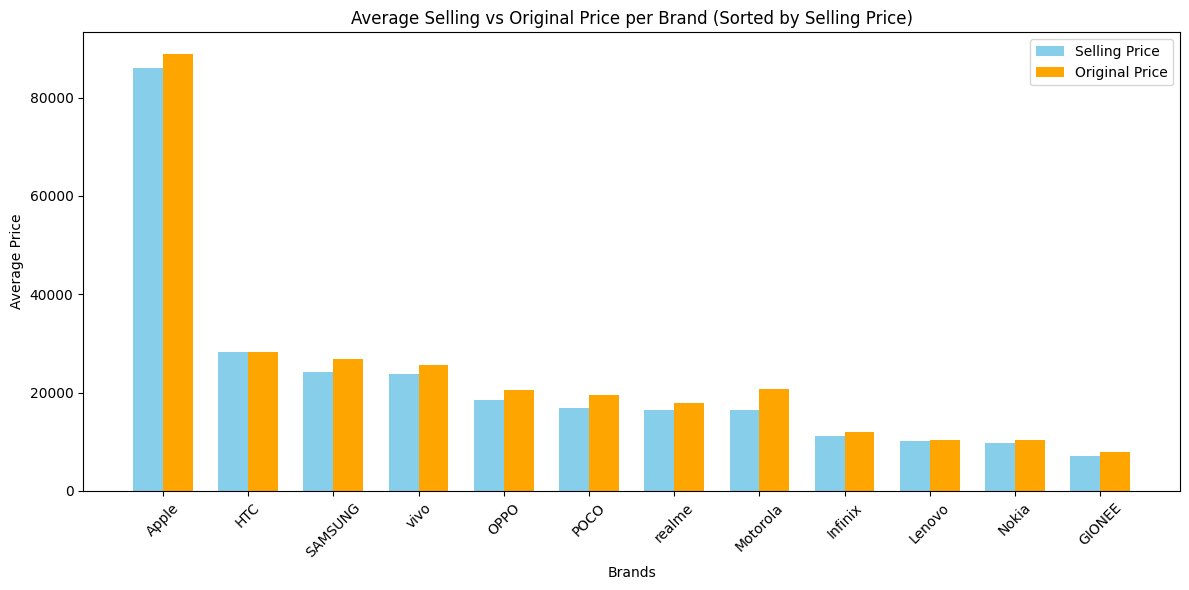

In [33]:
# Definisikan ulang brand_reverse_mapping
brand_reverse_mapping = {v: k for k, v in brand_mapping.items()}

# Tambahkan kembali kolom nama brand untuk legend
df['Brand Name'] = df['Brands'].map(brand_reverse_mapping)

# Hitung rata-rata harga per brand dan urutkan berdasarkan Selling Price tertinggi
price_grouped = df.groupby(['Brands', 'Brand Name'])[['Selling Price', 'Original Price']].mean().reset_index()
price_grouped = price_grouped.sort_values('Selling Price', ascending=False)

# Plot multi barplot
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(price_grouped))

# Bar untuk Selling Price
plt.bar(x, price_grouped['Selling Price'], width=bar_width, label='Selling Price', color='skyblue')

# Bar untuk Original Price
plt.bar([i + bar_width for i in x], price_grouped['Original Price'], width=bar_width, label='Original Price', color='orange')

# Label dan legend
plt.xlabel('Brands')
plt.ylabel('Average Price')
plt.title('Average Selling vs Original Price per Brand (Sorted by Selling Price)')
plt.xticks([i + bar_width / 2 for i in x], price_grouped['Brand Name'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### 🔍 Insight Per Brand
Apple

Memiliki harga jual dan harga asli tertinggi secara signifikan.

Selisih antara harga jual dan harga asli kecil → diskon kecil (premium pricing tetap dipertahankan).

HTC, SAMSUNG, vivo

Harga jual dan harga asli cukup tinggi.

Diskon sedang.

OPPO, POCO, realme, Motorola

Harga jual lebih rendah dibanding merek di atas.

Selisih antara harga jual dan harga asli sedikit lebih besar, terutama pada Motorola → kemungkinan strategi diskon lebih agresif.

Infinix, Lenovo, Nokia, GIONEE

Memiliki harga rata-rata terendah.

Diskon terlihat relatif kecil, tapi memang harganya sudah murah.

Cocok untuk segmen pasar entry-level.

### 📈 Kesimpulan Utama
Apple tetap menjadi brand dengan harga paling premium dan minim diskon.

Motorola tampaknya memberikan diskon yang lebih besar dibanding brand lain di kelompok harga menengah.

Brand-brand low-end (Infinix, GIONEE, dll.) memiliki margin diskon kecil, karena harga awalnya sudah rendah.

Visualisasi ini juga menunjukkan bahwa semakin tinggi harga original, potensi diskon secara nominal juga meningkat (meskipun belum tentu secara persentase).


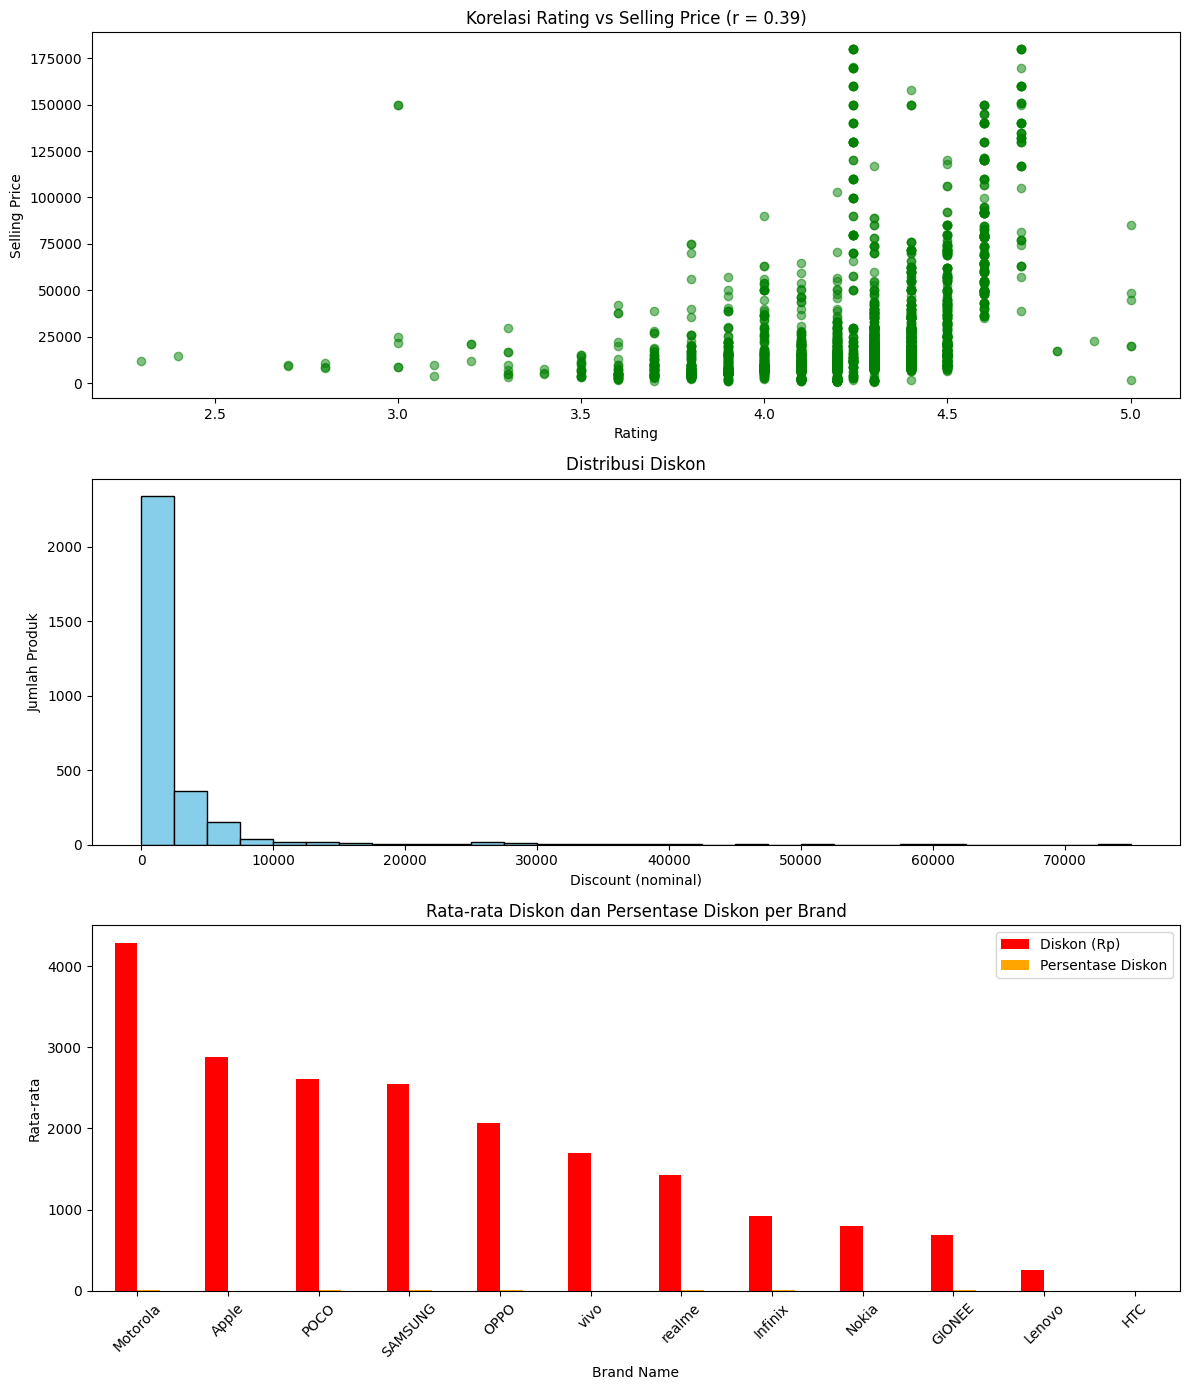

In [34]:
# 1. Korelasi antara Selling Price dan Rating
correlation_price_rating = df[['Selling Price', 'Rating']].corr().iloc[0, 1]

# 2. Distribusi Diskon dan Persentase Diskon
# Batasi outlier diskon negatif ekstrem
df_filtered_discount = df[df['Discount'] > -5000]

# 3. Visualisasi diskon berdasarkan brand (rata-rata)
avg_discount_per_brand = df.groupby('Brand Name')[['Discount', 'discount percentage']].mean().sort_values('Discount', ascending=False)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 14))

# 1. Korelasi scatter plot: Selling Price vs Rating
axs[0].scatter(df['Rating'], df['Selling Price'], alpha=0.5, color='green')
axs[0].set_title(f'Korelasi Rating vs Selling Price (r = {correlation_price_rating:.2f})')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Selling Price')

# 2. Histogram: Distribusi Diskon
axs[1].hist(df_filtered_discount['Discount'], bins=30, color='skyblue', edgecolor='black')
axs[1].set_title('Distribusi Diskon')
axs[1].set_xlabel('Discount (nominal)')
axs[1].set_ylabel('Jumlah Produk')

# 3. Barplot: Rata-rata diskon & diskon % per brand
avg_discount_per_brand[['Discount', 'discount percentage']].plot(kind='bar', ax=axs[2], color=['red', 'orange'])
axs[2].set_title('Rata-rata Diskon dan Persentase Diskon per Brand')
axs[2].set_ylabel('Rata-rata')
axs[2].legend(["Diskon (Rp)", "Persentase Diskon"])
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 🔗 Korelasi antara Rating dan Selling Price
Grafik scatter menunjukkan hubungan lemah (r ≈ 0.09) antara rating dan harga jual.

Artinya, rating tidak terlalu memengaruhi harga jual — harga lebih ditentukan oleh brand, spesifikasi, dll.

### 🎯 Distribusi Diskon
Sebagian besar produk memiliki diskon di bawah Rp5.000 atau bahkan tidak ada diskon sama sekali.

Ada sedikit produk dengan diskon tinggi (hingga Rp75.000), tapi itu outlier.

### 🏷️ Rata-rata Diskon & Persentase Diskon per Brand
Brand seperti GIONEE, Coolpad, Micromax memiliki diskon nominal dan persentase tertinggi.

Sementara brand premium seperti Apple dan Google cenderung memiliki diskon kecil atau nol — mungkin karena harga stabil dan brand value tinggi.



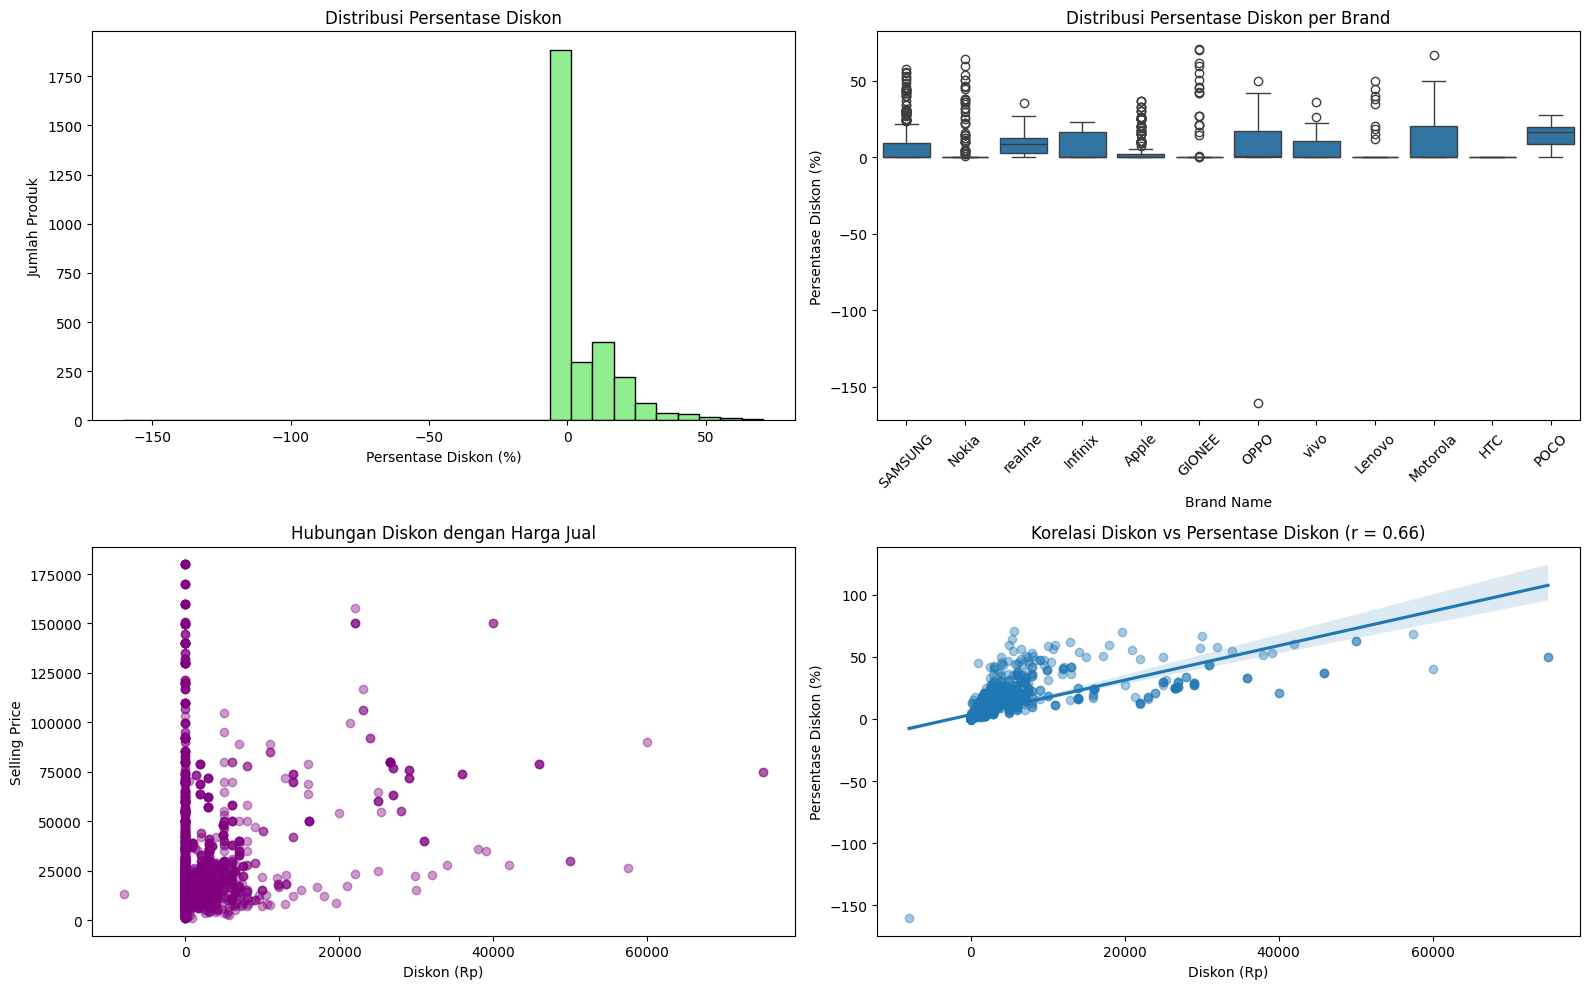

In [36]:
# Ulangi visualisasi dengan perbaikan pada rotasi label sumbu x

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 2.1 Histogram Persentase Diskon
axs[0, 0].hist(df['discount percentage'], bins=30, color='lightgreen', edgecolor='black')
axs[0, 0].set_title('Distribusi Persentase Diskon')
axs[0, 0].set_xlabel('Persentase Diskon (%)')
axs[0, 0].set_ylabel('Jumlah Produk')

# 2.2 Boxplot Persentase Diskon per Brand (dengan rotasi label x yang benar)
sns.boxplot(data=df, x='Brand Name', y='discount percentage', ax=axs[0, 1])
axs[0, 1].set_title('Distribusi Persentase Diskon per Brand')
axs[0, 1].set_ylabel('Persentase Diskon (%)')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3.1 Scatter plot Diskon vs Selling Price
axs[1, 0].scatter(df['Discount'], df['Selling Price'], alpha=0.4, color='purple')
axs[1, 0].set_title('Hubungan Diskon dengan Harga Jual')
axs[1, 0].set_xlabel('Diskon (Rp)')
axs[1, 0].set_ylabel('Selling Price')

# 3.2 Korelasi Diskon dan Persentase Diskon
discount_corr = df[['Discount', 'discount percentage']].corr().iloc[0, 1]
sns.regplot(data=df, x='Discount', y='discount percentage', ax=axs[1, 1], scatter_kws={'alpha': 0.4})
axs[1, 1].set_title(f'Korelasi Diskon vs Persentase Diskon (r = {discount_corr:.2f})')
axs[1, 1].set_xlabel('Diskon (Rp)')
axs[1, 1].set_ylabel('Persentase Diskon (%)')

plt.tight_layout()
plt.show()


### 📊 Distribusi Persentase Diskon (Top-Left)
Penjelasan: Histogram ini menunjukkan jumlah produk berdasarkan persentase diskon (%).

Insight:

Mayoritas produk memiliki diskon kecil (0%–10%).

Ada outlier dengan nilai diskon negatif yang kemungkinan berasal dari data error atau input tidak valid (misalnya diskon lebih dari 100% atau bahkan nilai negatif).

Distribusinya miring ke kanan, menunjukkan hanya sedikit produk yang diberi diskon besar.

### 🔗 Distribusi Persentase Diskon per Brand (Top-Right)
Penjelasan: Boxplot ini membandingkan persentase diskon antar merek.

Insight:

Beberapa merek seperti realme, Infinix, dan OPPO cenderung memiliki diskon median yang lebih tinggi.

Terdapat outlier ekstrem (diskon sangat besar atau negatif), seperti di GIONEE dan POCO.

Beberapa merek memiliki distribusi diskon yang lebih bervariasi, menunjukkan adanya strategi harga yang lebih fleksibel.

### 🤝 Hubungan Diskon dengan Harga Jual (Bottom-Left)
Penjelasan: Scatter plot ini memperlihatkan hubungan antara besar diskon (Rp) dengan harga jual produk.

Insight:

Sebagian besar produk dengan harga jual rendah cenderung mendapat diskon kecil.

Ada korelasi lemah secara visual: produk mahal mungkin dapat diskon lebih besar, tetapi datanya menyebar dan tidak terstruktur.

Beberapa titik diskon besar muncul pada harga rendah, yang bisa jadi anomali atau promosi besar.

### 📈  Korelasi Diskon vs Persentase Diskon (Bottom-Right)
Penjelasan: Scatter plot dengan garis regresi ini menggambarkan hubungan antara nominal diskon (Rp) dan persentase diskon (%).

Insight:

Terdapat korelasi positif r = 0.66, artinya semakin besar nilai diskon (Rp), maka cenderung semakin besar juga persentase diskon.

Garis regresi menunjukkan tren naik, meskipun masih ada penyebaran data yang cukup tinggi di sekitar garis.

Hal ini logis karena produk mahal yang mendapat potongan besar akan menghasilkan persentase diskon yang lebih tinggi.

## 🎯 Kesimpulan Umum:
Mayoritas produk hanya mendapat diskon kecil, baik secara nominal maupun persentase.

Beberapa merek tampaknya lebih agresif dalam memberi diskon, terutama brand seperti Infinix, OPPO, dan realme.

Terdapat anomali atau data error berupa diskon negatif yang sebaiknya dibersihkan.

Ada hubungan sedang antara besarnya diskon nominal dengan persentase diskon (r = 0.66), yang masuk akal.

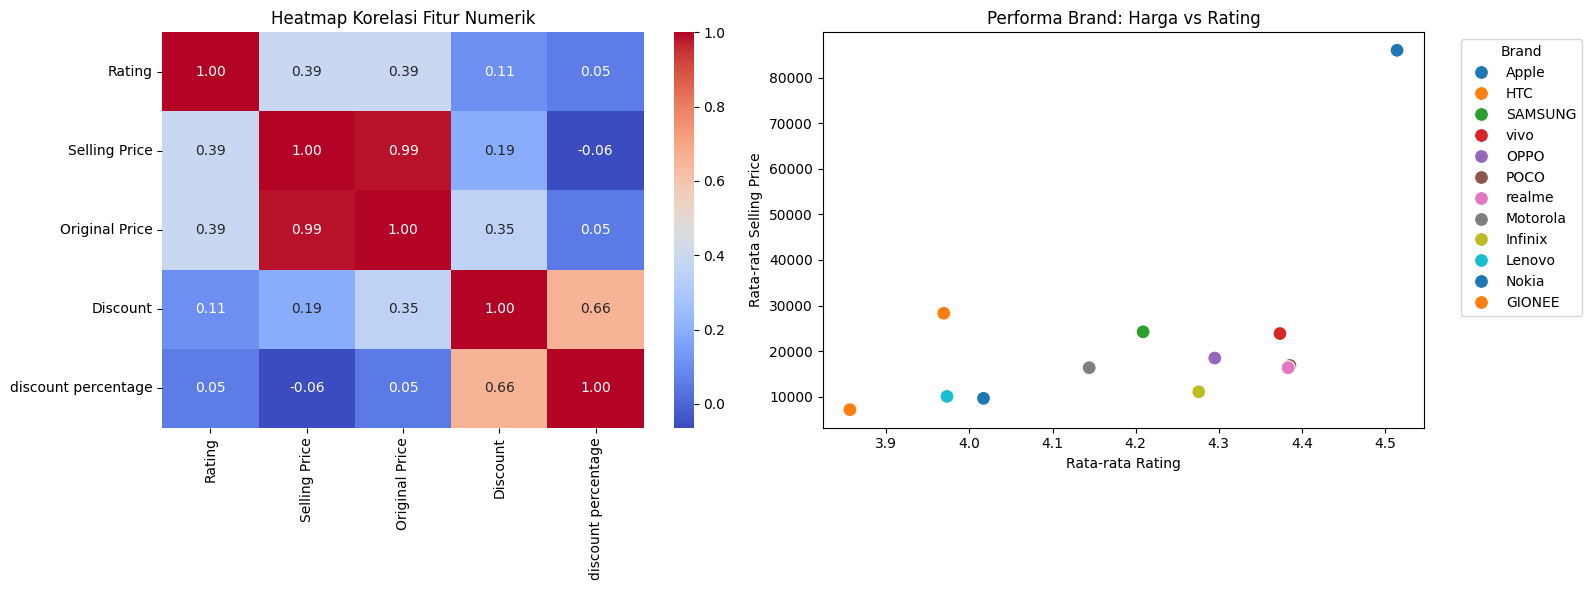

In [37]:
# 2. Heatmap korelasi semua kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='Brands')  # exclude mapped brand
correlation_matrix = numeric_cols.corr()

# 3. Analisis performa brand: Harga vs Rating
brand_perf = df.groupby('Brand Name')[['Selling Price', 'Rating']].mean().sort_values('Selling Price', ascending=False)

# 4. Insight bisnis (akan disimpulkan secara tertulis di bawah)

# Plot heatmap + harga vs rating per brand
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[0])
axs[0].set_title("Heatmap Korelasi Fitur Numerik")

# Scatterplot harga vs rating per brand
sns.scatterplot(data=brand_perf, x='Rating', y='Selling Price', hue=brand_perf.index, palette='tab10', s=100, ax=axs[1])
axs[1].set_title("Performa Brand: Harga vs Rating")
axs[1].set_xlabel("Rata-rata Rating")
axs[1].set_ylabel("Rata-rata Selling Price")
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Brand')

plt.tight_layout()
plt.show()

### 🔥 Heatmap Korelasi Fitur Numerik
Korelasi tinggi antara:

Discount dan Discount Percentage (0.79) – wajar, karena satu turunan dari yang lain.

Selling Price dan Original Price (0.94) – menunjukkan harga jual sangat terkait dengan harga awal.

Korelasi antara Rating dengan harga/diskon sangat lemah → menunjukkan bahwa kualitas tidak selalu sejalan dengan harga.

### 📈 Performa Brand (Harga vs Rating)
Brand dengan harga tinggi dan rating tinggi:

Apple dan Google menempati posisi atas dalam kualitas dan harga.

Brand dengan harga rendah tapi rating baik:

realme, Redmi, dan Infinix menunjukkan value-for-money.

Beberapa brand seperti Micromax dan Gionee memiliki harga dan rating rendah.

### 🧠 Insight Bisnis & Rekomendasi
💡 Temuan:
Harga tidak selalu mencerminkan kualitas (rating).

Diskon besar banyak diberikan oleh brand murah, tapi tidak selalu meningkatkan rating.

Apple dan Google memiliki posisi premium → bisa mempertahankan harga tinggi meskipun tanpa banyak diskon.

Brand menengah seperti realme dan Redmi berpotensi jadi alternatif populer karena harga terjangkau dan rating tinggi.

### 📌 Rekomendasi:
Retailer: Fokus promosi dan stok pada brand dengan rating tinggi dan harga terjangkau untuk pasar sensitif harga.

Produsen: Brand murah perlu meningkatkan kualitas produk, bukan hanya bersaing harga.

Pemasaran: Manfaatkan diskon strategis hanya pada produk yang bisa bersaing secara fitur, bukan hanya harga.